In [36]:
import pickle
import matplotlib.dates as mdates

from matplotlib import pyplot as plt
import numpy as np
from sklearn.decomposition import FastICA,PCA

plt.rcParams["date.converter"] = "concise"
%config InlineBackend.figure_format = "svg"

# Load data from file
with np.load("scattering_coefficients.npz", allow_pickle=True) as data:
    order_1 = data["order_1"]
    order_2 = data["order_2"]
    times = data["times"]

# Reshape and stack scattering coefficients of all orders
order_1 = order_1.reshape(order_1.shape[0], -1)
order_2 = order_2.reshape(order_2.shape[0], -1)
scattering_coefficients = np.hstack((order_1, order_2))

# transform into log
scattering_coefficients = np.log(scattering_coefficients)

# print info about shape
n_times, n_coeff = scattering_coefficients.shape
print("Collected {} samples of {} dimensions each.".format(n_times, n_coeff))

Collected 450 samples of 792 dimensions each.


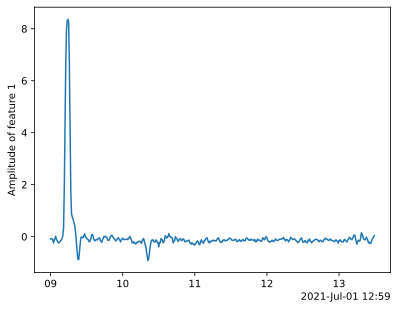

In [37]:
model = FastICA(n_components=10, whiten="unit-variance", random_state=42)
ica_features = model.fit_transform(scattering_coefficients)
from scipy.ndimage import uniform_filter1d
feature_id = 1

smoothed_featu = uniform_filter1d(ica_features[:, feature_id], size=3)
fig = plt.figure()
ax = plt.axes()

# Plot the weights
ax.plot(times, smoothed_featu)
ax.set_ylabel(f"Amplitude of feature {feature_id}")

# Show
plt.show()

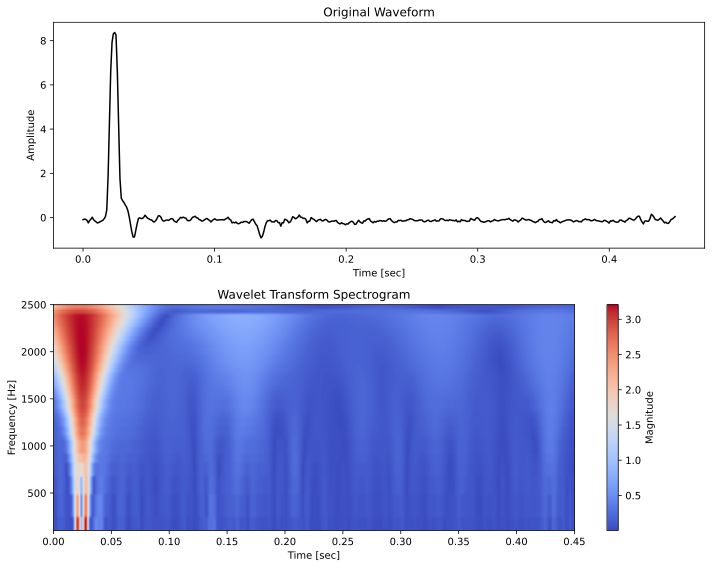

In [39]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import cwt, morlet

fs = 5000  # Fréquence d'échantillonnage
fc = 1

num_scales = 50  # Nombre de points d'échelle
s_min = fs * fc / 2000
s_max = fs * fc / 100
widths = np.logspace(np.log10(s_min), np.log10(s_max), num_scales).astype(int) 

frequencies = fs * fc / widths
Zxx = cwt(smoothed_featu, morlet, widths)

# Création du temps correspondant aux données
times = np.linspace(0, 5*len(smoothed_featu) / fs, num=len(smoothed_featu))

# Affichage
fig, axs = plt.subplots(2, 1, figsize=(10, 8))
axs[0].plot(times, smoothed_featu, color = 'k')
axs[0].set_title('Original Waveform')
axs[0].set_xlabel('Time [sec]')
axs[0].set_ylabel('Amplitude')   

pcm = axs[1].imshow(np.abs(Zxx), extent=[times.min(), times.max(), frequencies.min(), frequencies.max()], cmap='coolwarm', aspect='auto', origin='lower')
axs[1].set_title('Wavelet Transform Spectrogram')
axs[1].set_xlabel('Time [sec]')
axs[1].set_ylabel('Frequency [Hz]')
fig.colorbar(pcm, ax=axs[1], label='Magnitude')
plt.tight_layout()
plt.show()


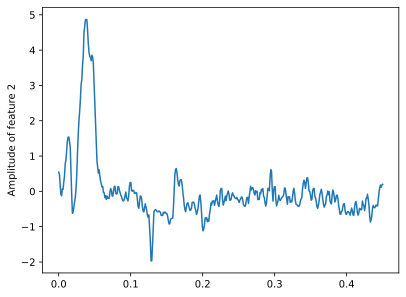

In [40]:
model = FastICA(n_components=4, whiten="unit-variance", random_state=42)
ica_features = model.fit_transform(scattering_coefficients)
feature_id = 2
smoothed_featu = uniform_filter1d(ica_features[:, feature_id], size=3)
fig = plt.figure()
ax = plt.axes()

# Plot the weights
ax.plot(times, smoothed_featu)
ax.set_ylabel(f"Amplitude of feature {feature_id}")

# Show
plt.show()